In [1]:
source('../src/load_data.r')
source('../src/multiplot.r')

In [2]:
dim(housing_df)

[1] 1451   80

In [3]:
head(housing_df)

MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,RL,65,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,2,2008,WD,Normal,208500
20,RL,80,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,⋯,0,without,without,without,0,5,2007,WD,Normal,181500
60,RL,68,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,9,2008,WD,Normal,223500
70,RL,60,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,⋯,0,without,without,without,0,2,2006,WD,Abnorml,140000
60,RL,84,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,⋯,0,without,without,without,0,12,2008,WD,Normal,250000
50,RL,85,14115,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,⋯,0,without,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [4]:
count_empty_total()

In [5]:
numeric_features = colnames(Filter(is.numeric, housing_df))
numeric_features

[1] "LotFrontage"   "LotArea"       "YearBuilt"     "YearRemodAdd" 
 [5] "MasVnrArea"    "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"    
 [9] "TotalBsmtSF"   "FirstFlrSF"    "SecondFlrSF"   "LowQualFinSF" 
[13] "GrLivArea"     "GarageYrBlt"   "GarageArea"    "WoodDeckSF"   
[17] "OpenPorchSF"   "EnclosedPorch" "ThreeSsnPorch" "ScreenPorch"  
[21] "PoolArea"      "MiscVal"       "YrSold"        "SalePrice"

In [6]:
factor_features = colnames(Filter(is.factor, housing_df))
factor_features

[1] "MSSubClass"    "MSZoning"      "LotShape"      "LandContour"  
 [5] "Utilities"     "LotConfig"     "LandSlope"     "Neighborhood" 
 [9] "Condition1"    "Condition2"    "BldgType"      "HouseStyle"   
[13] "Street"        "Alley"         "OverallQual"   "OverallCond"  
[17] "RoofStyle"     "RoofMatl"      "Exterior1st"   "Exterior2nd"  
[21] "MasVnrType"    "ExterQual"     "ExterCond"     "Foundation"   
[25] "BsmtQual"      "BsmtCond"      "BsmtExposure"  "BsmtFinType1" 
[29] "BsmtFinType2"  "Heating"       "HeatingQC"     "CentralAir"   
[33] "Electrical"    "BsmtFullBath"  "BsmtHalfBath"  "FullBath"     
[37] "HalfBath"      "BedroomAbvGr"  "KitchenAbvGr"  "KitchenQual"  
[41] "TotRmsAbvGrd"  "Functional"    "Fireplaces"    "FireplaceQu"  
[45] "GarageType"    "GarageFinish"  "GarageCars"    "GarageQual"   
[49] "GarageCond"    "PavedDrive"    "PoolQC"        "Fence"        
[53] "MiscFeature"   "MoSold"        "SaleType"      "SaleCondition"

In [7]:
attach(housing_df)

## Normality Check

### QQ-Plots

The quantiles of a given data set are plotted against the quantiles of a reference distribution, typically the standard normal distribution.

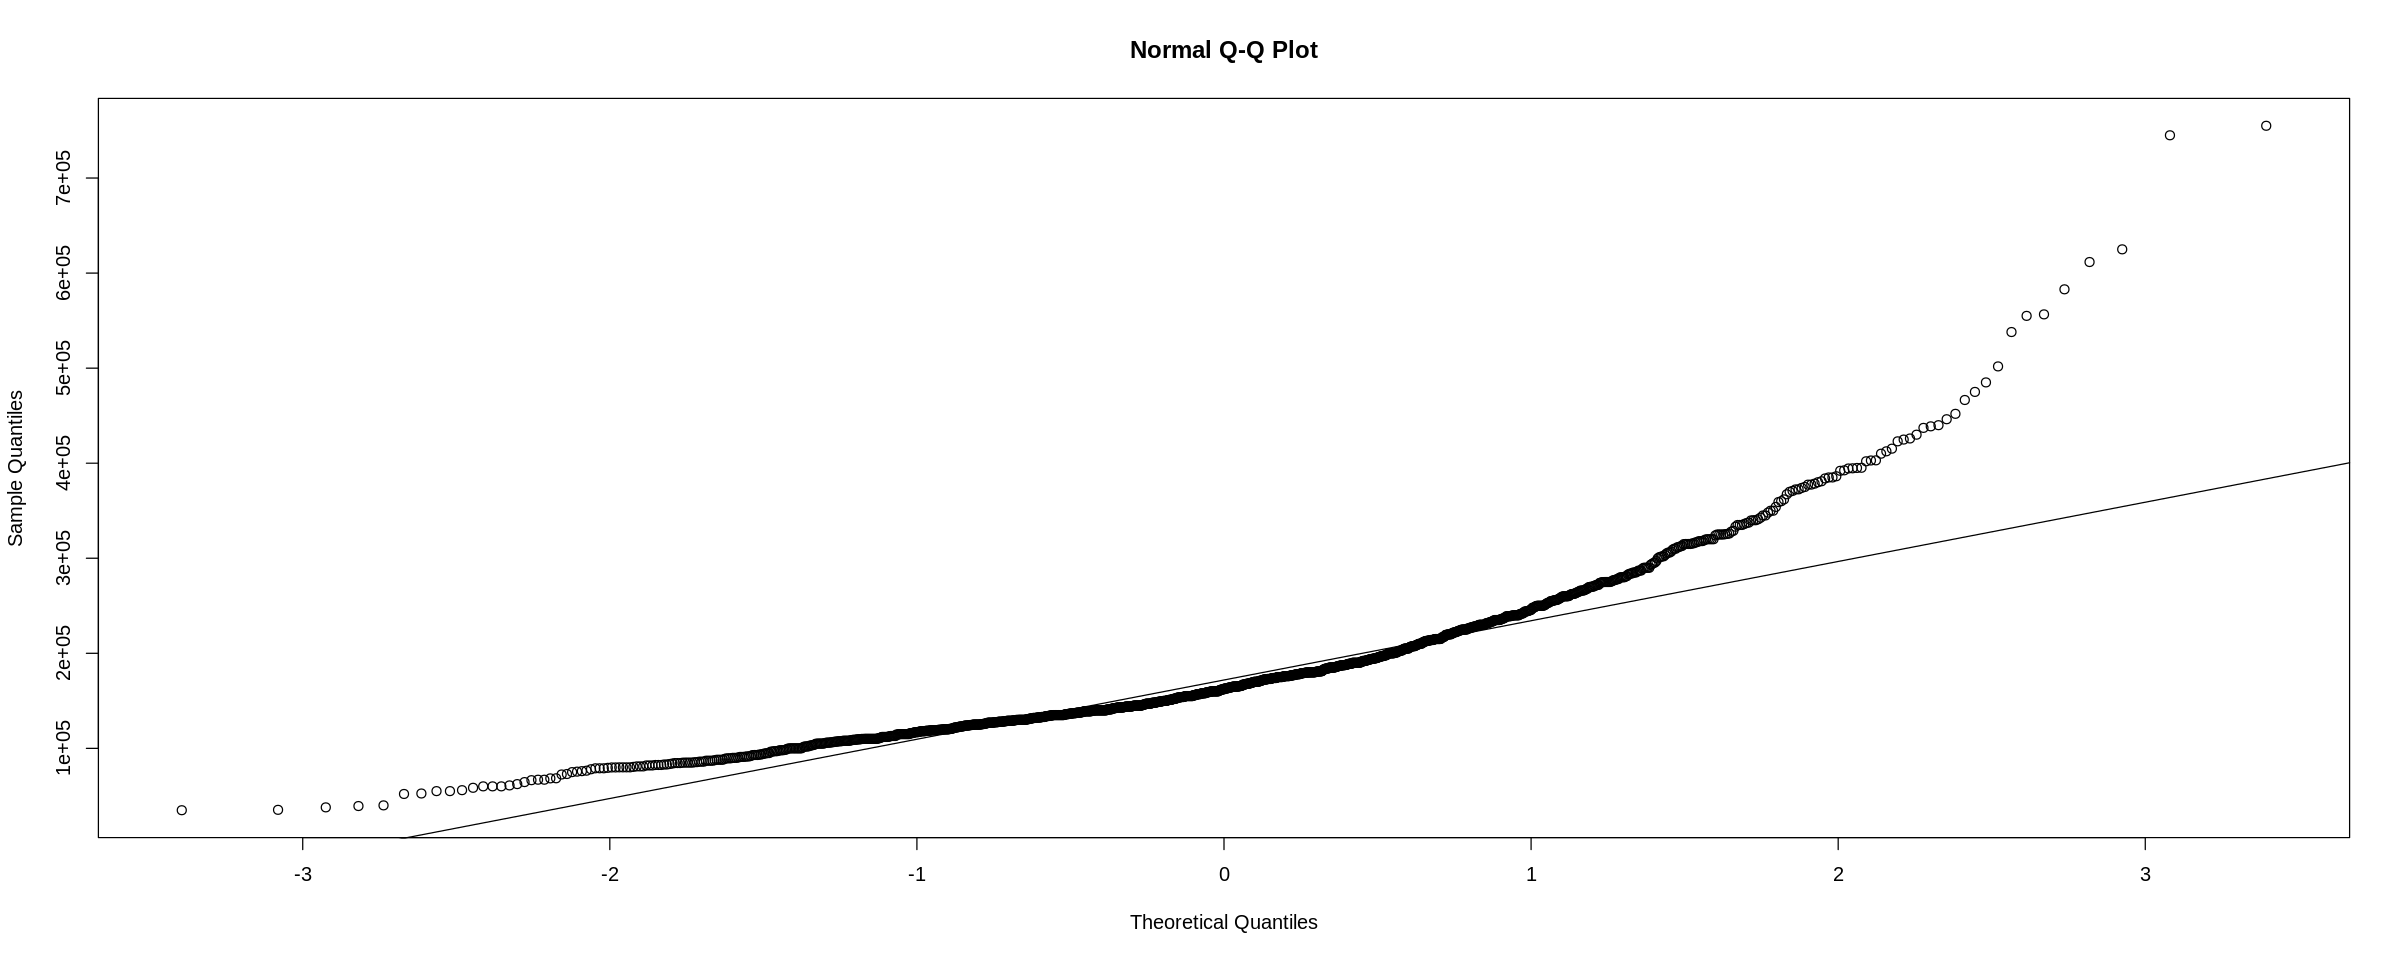

In [8]:
qqnorm(SalePrice)
qqline(SalePrice)

### Tests for Normality

The Shapiro–Wilk test tests the normality of a given distribution.

The null-hypothesis of this test is that the population is normally distributed. Thus, if the p-value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not from a normally distributed population; in other words, the data are not normal.

In [9]:
shapiro.test(SalePrice)


	Shapiro-Wilk normality test

data:  SalePrice
W = 0.86976, p-value < 2.2e-16


## Hypothesis Tests in General

1. A random sample is drawn from a population.
1. A null hypothesis is formed e.g. there is no difference between the distribution of the population and the standard normal distribution.
1. A test-statistic is calculated, one for which we know the probability distribution.
1. Comparing the observed value of the statistic with the corresponding distribution, we can find the likelihood that a value as or more extreme than the observed on is found by random chance. This is the $p$-value.
1. If the p-value is less then some number (usuall if $p < 0.05$, we reject the null hypothesis, and spea of a statistically significant difference. 
   - If a value of $P<0.001$ is obtained, the result is typically called *highly significant*. 
   - i.e. the $p$-value states how likely it is that we would obaint a value as extreme as we have *if the null hypothesis is true*.

# WARNING

A value of $p<0.05$ for the null hypothesis has to be interpreted as follows: 

> *If the null hypothesis is true, the chance of a test statistic as or more extreme than the one observed is less than 5%*

This is **not** the same as saying the that null hypothesis is false.

This is **DEFINITELY NOT THE SAME** as saying that an alternative hypothesis is true.